In [1]:
import pandas as pd
import pydotplus
from IPython.display import Image


from sklearn import tree, metrics
from sklearn.model_selection import cross_val_score, train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-notebook')

In [2]:
# подготовим входной файл
new_lines = []
with open("german.data-numeric.txt", "r") as f_in:
    lines = f_in.readlines()
    for line in lines:
        new_line = line.replace("  ", " ")
        for i in xrange(5):
            new_line = new_line.replace("  ", " ")
        if new_line[0] == " ":
            new_line = new_line[1:]
        new_line = new_line.replace(" \n", "\n")
        new_lines += [new_line]
with open("my_data", "w") as f_out:
    f_out.writelines(new_lines)


In [3]:
# посмотрим на данные и подготовим выборку
data = pd.read_csv('my_data', delimiter=' ', header=None)

X = data.values[:,:-1]
y = data.values[:,-1]
train_data, test_data, train_target, test_target = train_test_split(X, y,
                                                                    test_size = 0.2, random_state = 123)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [4]:
classifier = tree.DecisionTreeClassifier(max_depth=2)
classifier.fit(train_data, train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [5]:
dot_data = tree.export_graphviz(classifier, out_file="my_tree.out",
                        class_names = ["Yes", "No"],
                         filled=True, rounded=True,  
                         special_characters=True)  

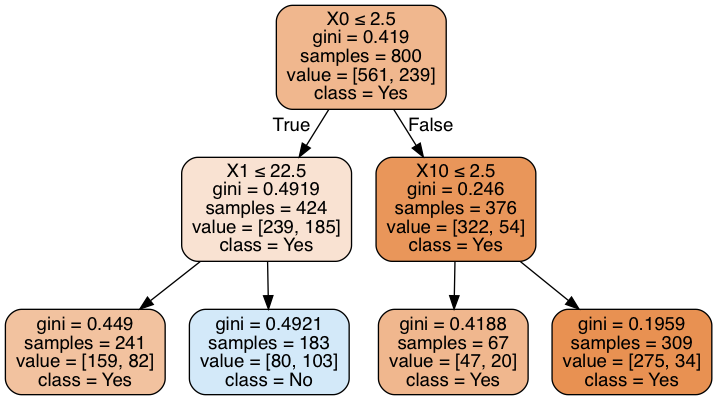

In [6]:
graph = pydotplus.graphviz.graph_from_dot_file("my_tree.out")  
Image(graph.create_png())  

Первое разбиение происходит по наличию текущего счета и средств на нем.

Если счет большой или его нет, то смотрится по наличию задолжностей перед кем-либо.

Иначе мы выдаем только короткосрочные кредиты (менее 22 месяцев).

In [7]:
cvscore = []
trscore = []
heights = range(1,30)
for height in heights:
    classifier = tree.DecisionTreeClassifier(max_depth=height)
    cvscore += [cross_val_score(classifier, X, y, scoring="f1").mean(0)]
    classifier.fit(X, y)
    trscore += [metrics.f1_score(y, classifier.predict(X))]

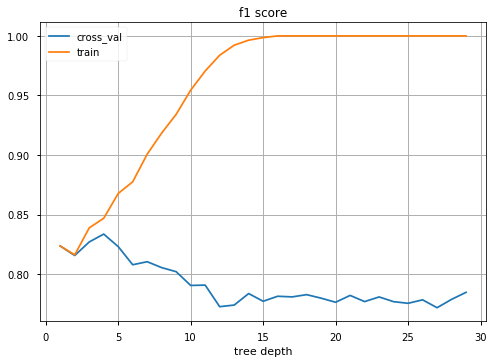

In [8]:
plt.plot(heights, cvscore, label = 'cross_val')
plt.plot(heights, trscore, label = 'train')
plt.legend(loc = 2)
plt.grid()
plt.title("f1 score")
plt.xlabel("tree depth")
plt.show()

Видно, что при глубине чуть больше 15 наше дерево полностью настраивается на обучающую выборку. При этом качество на тестовой не улучшатеся.